In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [10]:
data_train_path='C:/Users/ACER/OneDrive/Desktop/AshwiCst/Image_Classification/poor_good/train'
data_test_path='C:/Users/ACER/OneDrive/Desktop/AshwiCst/Image_Classification/poor_good/test'
data_val_path='C:/Users/ACER/OneDrive/Desktop/AshwiCst/Image_Classification/poor_good/validation'

In [11]:
img_width=180
img_height=180

In [12]:
data_train=tf.keras.utils.image_dataset_from_directory(data_train_path,shuffle=True,image_size=(img_width,img_height),
                                                      batch_size=32,validation_split=False)

Found 586 files belonging to 2 classes.


In [13]:
data_cat=data_train.class_names

In [14]:
data_val=tf.keras.utils.image_dataset_from_directory(data_val_path,image_size=(img_height,img_width),
                                                    batch_size=32,shuffle=False,validation_split=False)

Found 586 files belonging to 2 classes.


In [15]:
data_test=tf.keras.utils.image_dataset_from_directory(data_test_path,
                                                     image_size=(img_height,img_width),shuffle=False,
                                                     batch_size=32,validation_split=False)

Found 586 files belonging to 2 classes.


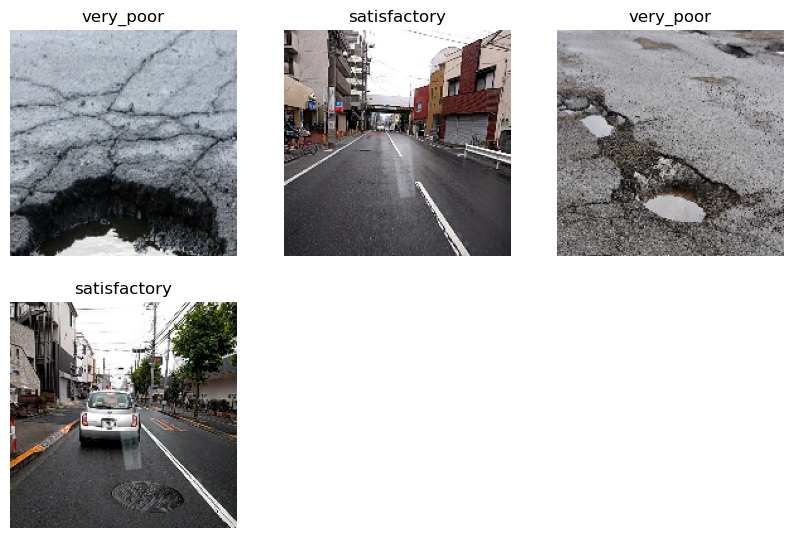

In [20]:
plt.figure(figsize=(10,10))
for image,labels in data_train.take(1):
    for i in range(4):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [17]:
from tensorflow.keras.models import Sequential

In [18]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [24]:
model=Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])

In [25]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [26]:
epochs_size=25
history=model.fit(data_train,validation_data=data_val,epochs=epochs_size)

Epoch 1/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 23s 824ms/step - accuracy: 0.5460 - loss: 2.4462 - val_accuracy: 0.9676 - val_loss: 0.1844
Epoch 2/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 520ms/step - accuracy: 0.9493 - loss: 0.1553 - val_accuracy: 0.9727 - val_loss: 0.0658
Epoch 3/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 12s 614ms/step - accuracy: 0.9778 - loss: 0.0716 - val_accuracy: 0.9727 - val_loss: 0.0608
Epoch 4/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 11s 596ms/step - accuracy: 0.9829 - loss: 0.0563 - val_accuracy: 0.9744 - val_loss: 0.0636
Epoch 5/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 12s 632ms/step - accuracy: 0.9781 - loss: 0.0584 - val_accuracy: 0.9898 - val_loss: 0.0225
Epoch 6/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 11s 581ms/step - accuracy: 0.9903 - loss: 0.0328 - val_accuracy: 0.9778 - val_loss: 0.0494
Epoch 7/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 527ms/step - accuracy: 0.9933 - loss: 0.0124 - val_accuracy: 0.9983 - val_loss: 0.0079
Epoch 8/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 11s 571ms/step - accuracy: 1.0000 - loss: 0.0046 - val_accu

Text(0.5, 1.0, 'Loss')

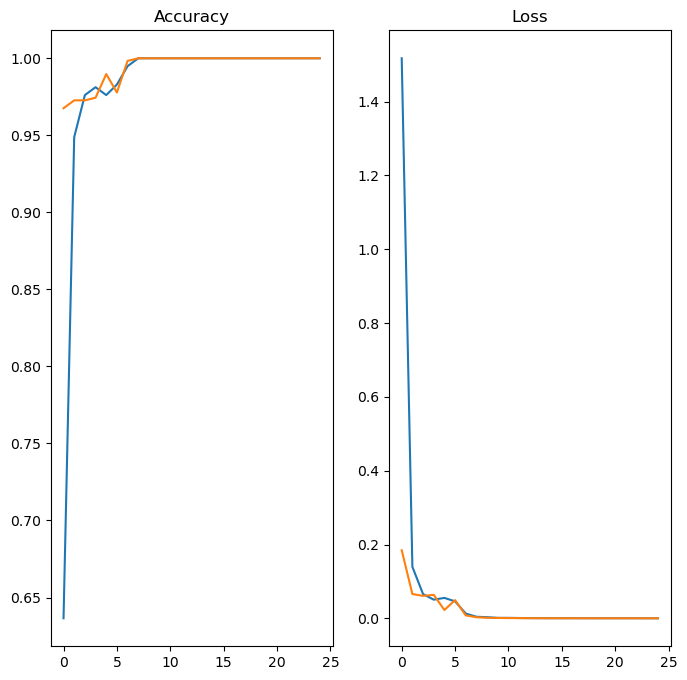

In [28]:
epochs_range=range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label='Training Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label='Training Loss')
plt.plot(epochs_range,history.history['val_loss'],label='Validation Loss')
plt.title('Loss')



In [46]:
image='C:/Users/ACER/OneDrive/Desktop/AshwiCst/Image_Classification/OIP (1).jpeg'
image=tf.keras.utils.load_img(image,target_size=(img_height,img_width))
img_arr=tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [47]:
predict=model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [48]:
score=tf.nn.softmax(predict)

In [49]:
print('good/poor in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

good/poor in image is very_poor with accuracy of 70.51


In [50]:
model.save('Image_classify.keras')